In [1]:
"""Problem 1"""

'Problem 1'

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
bank=pd.read_csv('bank_marketing_part1_Data.csv') 

In [3]:
# 1.1 Read the data and do exploratory data analysis. Describe the data briefly.
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank.shape

(210, 7)

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
bank['spending'] =  bank['spending'] * 1000
bank['advance_payments'] =  bank['advance_payments'] * 100
bank['current_balance'] =  bank['current_balance'] * 1000
bank['credit_limit'] =  bank['credit_limit'] * 10000
bank['min_payment_amt'] =  bank['min_payment_amt'] * 100
bank['max_spent_in_single_shopping'] =  bank['max_spent_in_single_shopping'] * 1000

In [7]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0


In [8]:
bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14847.523810,1455.928571,0.870999,5628.533333,32586.047619,370.020095,5408.071429
std,2909.699431,130.595873,0.023629,443.063478,3777.144449,150.355713,491.480499
min,10590.000000,1241.000000,0.808100,4899.000000,26300.000000,76.510000,4519.000000
25%,12270.000000,1345.000000,0.856900,5262.250000,29440.000000,256.150000,5045.000000
50%,14355.000000,1432.000000,0.873450,5523.500000,32370.000000,359.900000,5223.000000
75%,17305.000000,1571.500000,0.887775,5979.750000,35617.500000,476.875000,5877.000000
max,21180.000000,1725.000000,0.918300,6675.000000,40330.000000,845.600000,6550.000000


In [9]:
bank.isnull().values.any()

False

In [10]:
bank.duplicated().sum()

0

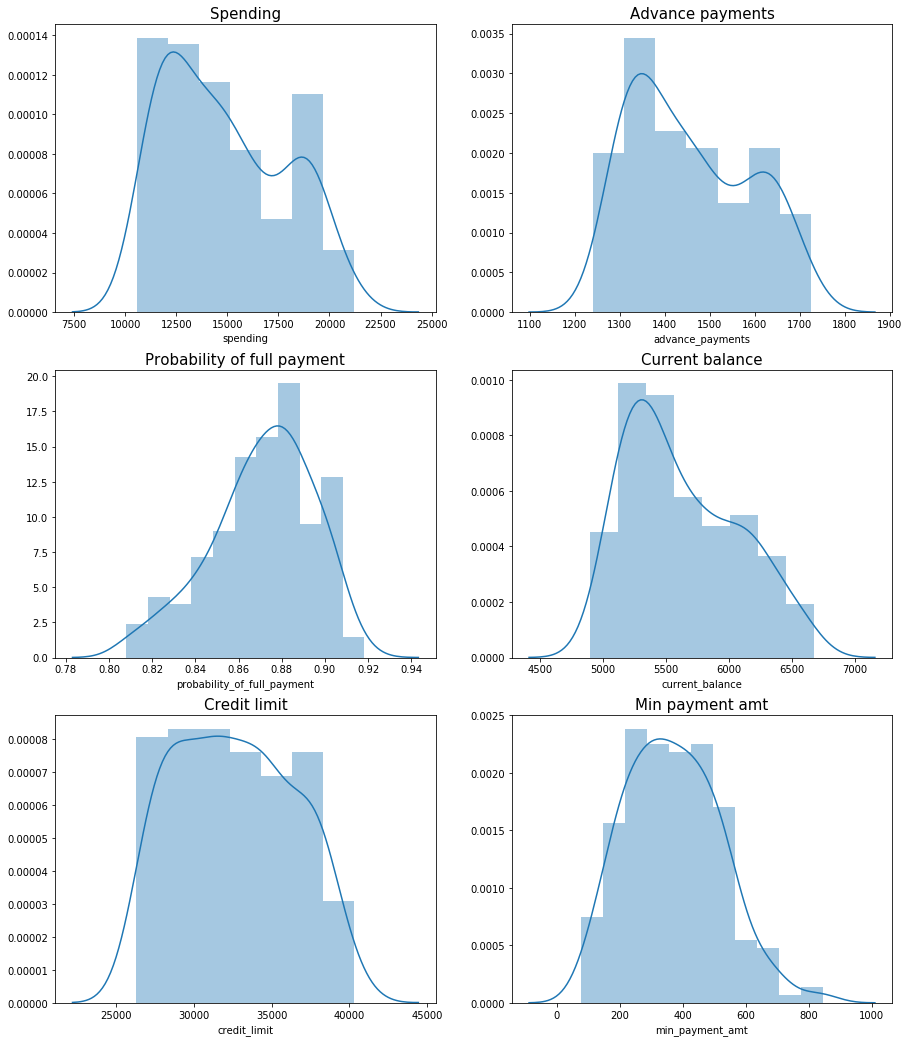

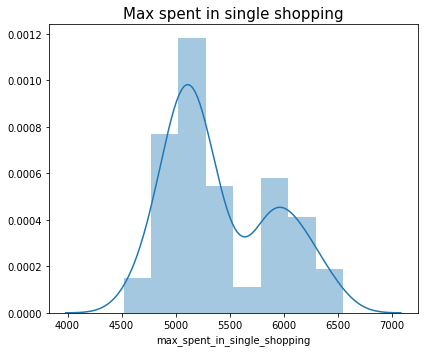

In [11]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 18)
a = sns.distplot(bank['spending'] , ax=axes[0][0])
a.set_title("Spending",fontsize=15)
a = sns.distplot(bank['advance_payments'] , ax=axes[0][1])
a.set_title("Advance payments",fontsize=15)

a = sns.distplot(bank['probability_of_full_payment'] , ax=axes[1][0])
a.set_title("Probability of full payment",fontsize=15)
a = sns.distplot(bank['current_balance'] , ax=axes[1][1])
a.set_title("Current balance",fontsize=15)

a = sns.distplot(bank['credit_limit'] , ax=axes[2][0])
a.set_title("Credit limit",fontsize=15)
a = sns.distplot(bank['min_payment_amt'], ax=axes[2][1])
a.set_title("Min payment amt",fontsize=15)

fig, axes = plt.subplots(nrows=1,ncols=1)
fig.set_size_inches(6,5)
b = sns.distplot(bank['max_spent_in_single_shopping'])
b.set_title("Max spent in single shopping",fontsize=15)

plt.tight_layout()
plt.show()

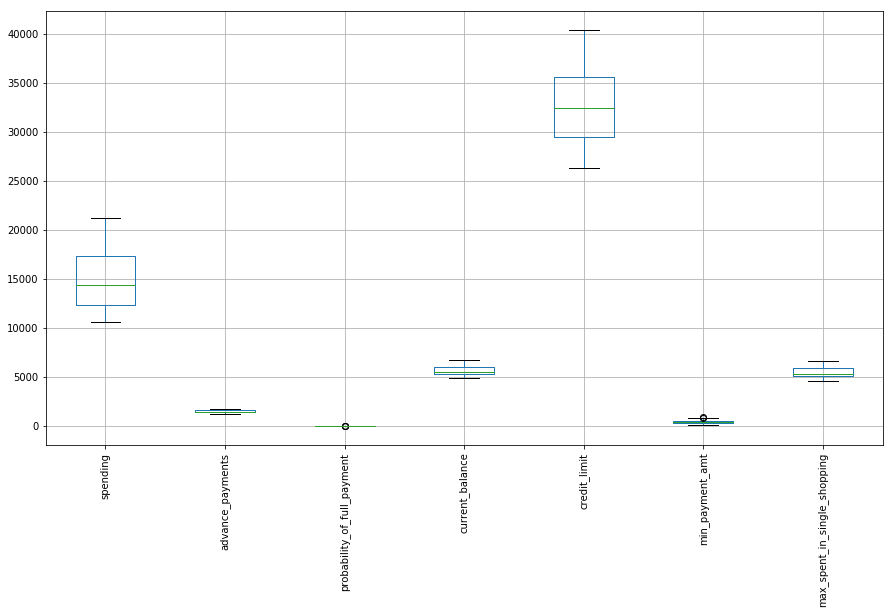

In [41]:
bank.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show()

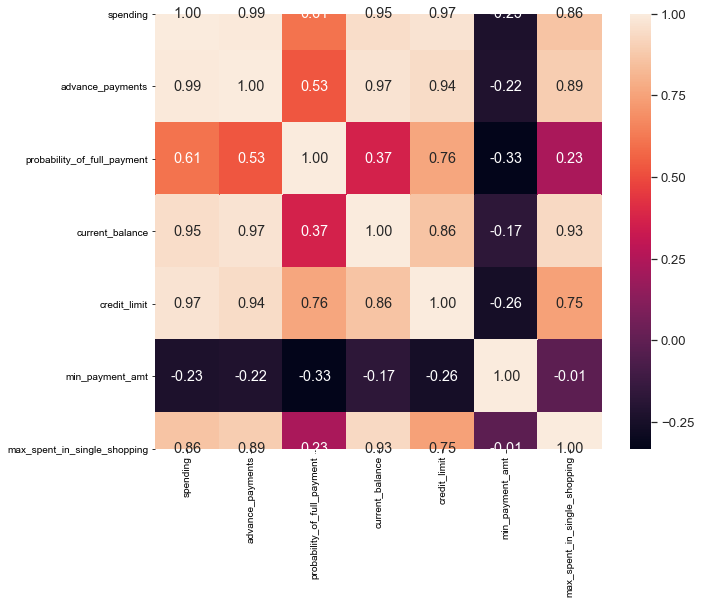

In [12]:
# Check for correlation of variable
plt.subplots(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(bank.corr(), annot=True,fmt='.2f')

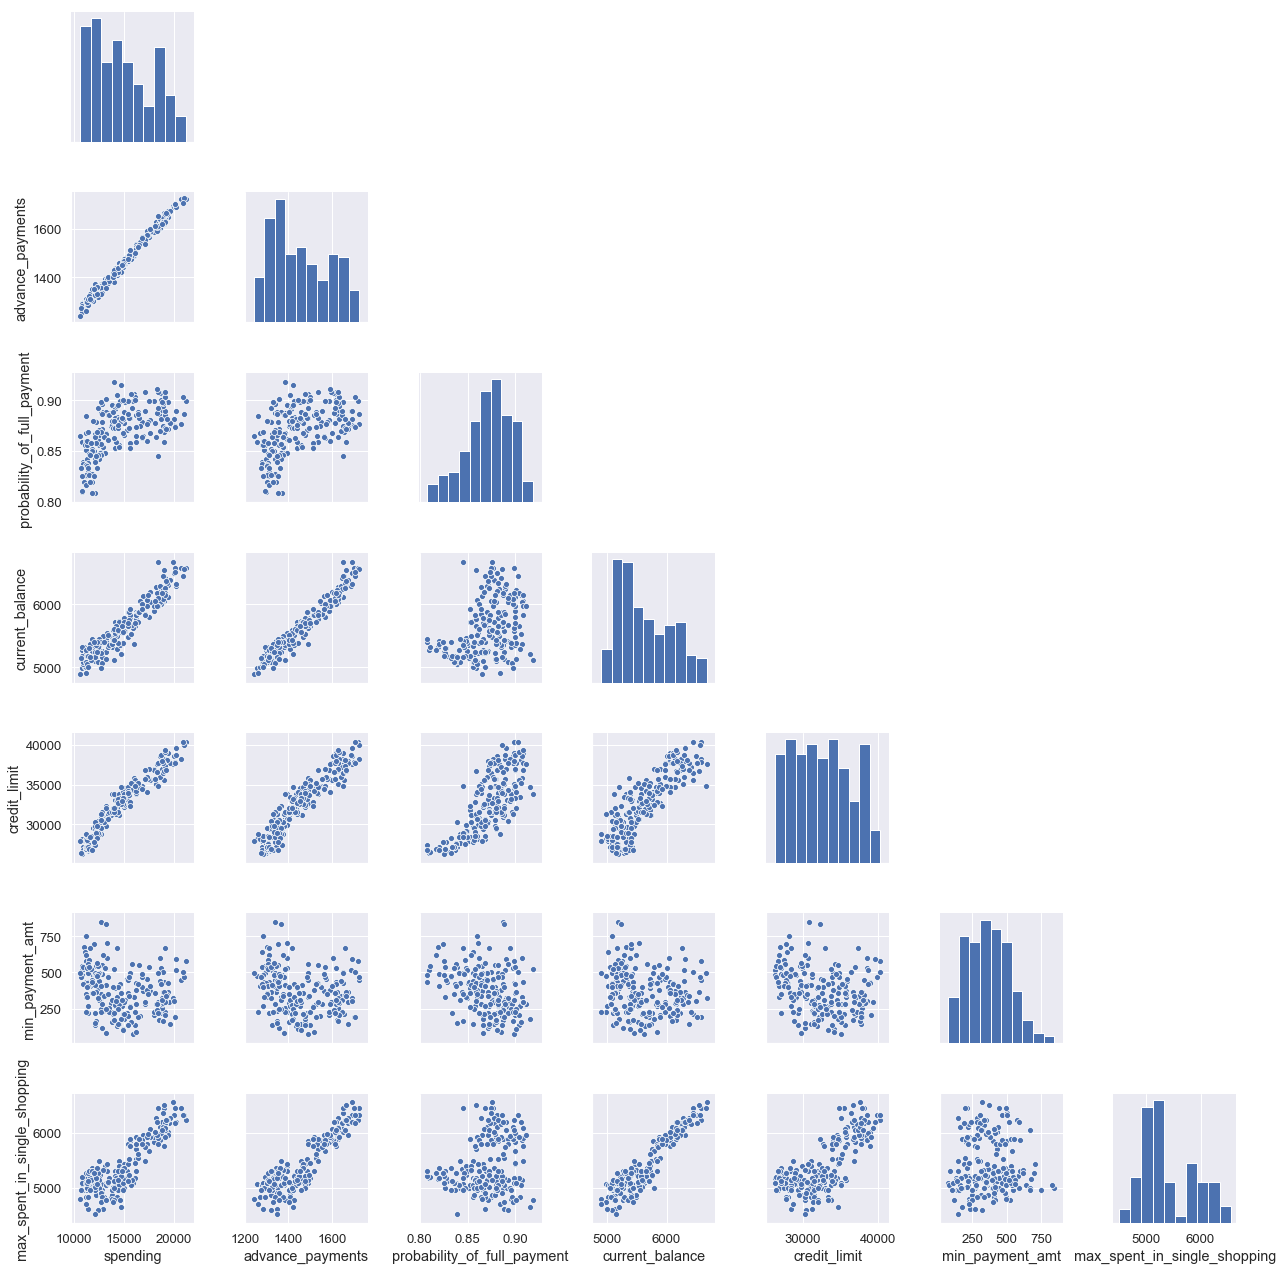

In [24]:
sns.pairplot(bank, corner = True)

In [13]:
# 1.2  Do you think scaling is necessary for clustering in this case? Justify
from scipy.stats import zscore
bank_scaled =bank.apply(zscore)

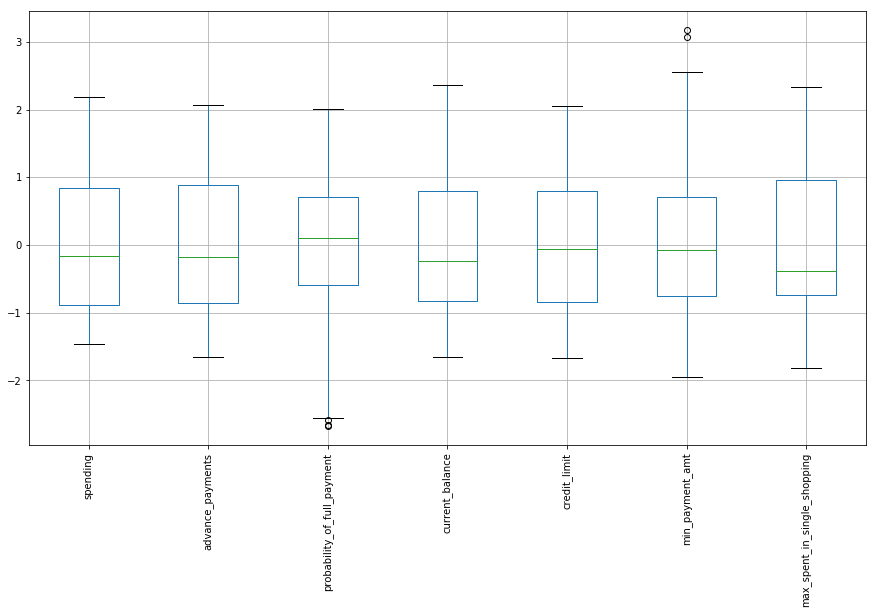

In [19]:
bank_scaled.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show()

In [8]:
# 1.3 Apply hierarchical clustering to scaled data. 
# Identify the number of optimum clusters using Dendrogram and briefly describe them

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(bank_scaled, method = 'ward')

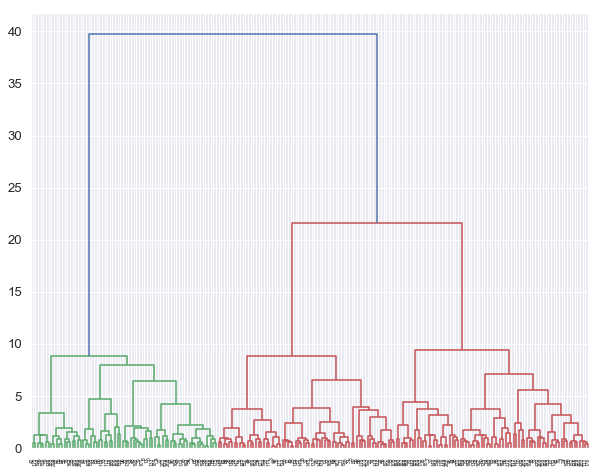

In [30]:
plt.subplots(figsize=(10,8))
dend = dendrogram(wardlink)

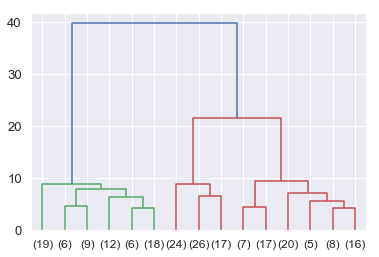

In [29]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp', #only the last p clusters merged are shown
                 p = 15,
                 )

In [12]:
from scipy.cluster.hierarchy import fcluster

In [47]:
# Method 2
clusters = fcluster(wardlink, 30, criterion='distance')
clusters
bank['clusters_hierarchical'] = clusters
bank.to_csv('heirarchical.csv')

In [14]:
heirarchical=pd.read_csv('heirarchical.csv') 

In [15]:
heirarchical.drop('Unnamed: 0',axis=1,inplace = True)

In [16]:
heirarchical.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_hierarchical
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,1
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,1
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,2
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,1


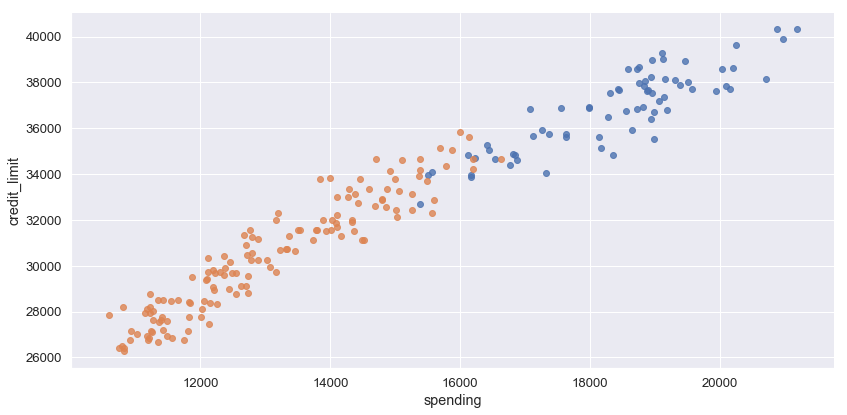

In [51]:
sns.lmplot('spending','credit_limit',hue ='clusters_hierarchical' , data=bank,
                fit_reg=False, legend=False, scatter=True,height=6,aspect=2) 

In [16]:
heirarchical.clusters_hierarchical.value_counts().sort_index()

1     70
2    140
Name: clusters_hierarchical, dtype: int64

In [19]:
#Cluster profile
clust_profile_heirarchical=heirarchical.groupby('clusters_hierarchical').mean()
clust_profile_heirarchical['freq']=heirarchical.clusters_hierarchical.value_counts().sort_index()
clust_profile_heirarchical.transpose()

clusters_hierarchical,1,2
spending,18371.428571,13085.571429
advance_payments,1614.542857,1376.621429
probability_of_full_payment,0.884400,0.864298
current_balance,6158.171429,5363.714286
credit_limit,36846.285714,30455.928571
min_payment_amt,363.915714,373.072286
max_spent_in_single_shopping,6017.371429,5103.421429
freq,70.000000,140.000000


In [32]:
# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [18]:
from sklearn.cluster import KMeans

In [19]:
# Calculating WSS for other values of K - Elbow Method
wss =[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(bank_scaled)
    wss.append(KM.inertia_)

In [20]:
wss

[1469.9999999999993,
 659.171754487041,
 430.6589731513006,
 371.301721277542,
 327.1898110882489,
 289.4518051947613,
 262.9297849511246,
 239.22501174098176,
 224.00954174349798,
 208.43225211340953]

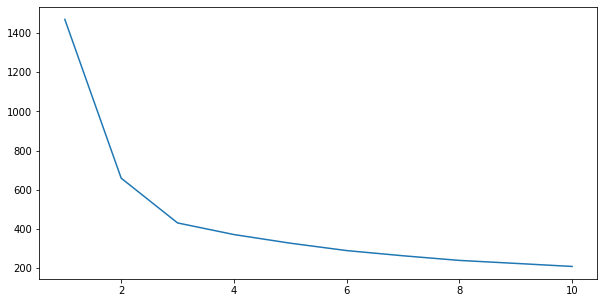

In [21]:
fig,ax = plt.subplots(figsize=(10,5)) 
plt.plot(range(1,11), wss)

In [22]:
k_means_2 = KMeans(n_clusters = 2)
k_means_2.fit(bank_scaled)
labels_2 = k_means_2.labels_

In [23]:
k_means_3 = KMeans(n_clusters = 3)
k_means_3.fit(bank_scaled)
labels_3 = k_means_3.labels_

In [24]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(bank_scaled)
labels_4 = k_means_4.labels_

In [25]:
k_means_5 = KMeans(n_clusters = 5)
k_means_5.fit(bank_scaled)
labels_5 = k_means_5.labels_

In [26]:
# silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score

In [27]:
print("Silhouette score for 2 clusters:",silhouette_score(bank_scaled,labels_2)) #better
print("Silhouette score for 3 clusters:",silhouette_score(bank_scaled,labels_3))
print("Silhouette score for 4 clusters:",silhouette_score(bank_scaled,labels_4))
print("Silhouette score for 5 clusters:",silhouette_score(bank_scaled,labels_5))

Silhouette score for 2 clusters: 0.46577247686580914
Silhouette score for 3 clusters: 0.4007270552751299
Silhouette score for 4 clusters: 0.3291966792017614
Silhouette score for 5 clusters: 0.2790792425136618


In [28]:
print("Minimum Silhouette width for 2 clusters:",silhouette_samples(bank_scaled,labels_2).mean())
print("Minimum Silhouette width for 3 clusters:",silhouette_samples(bank_scaled,labels_3).mean())
print("Minimum Silhouette width for 4 clusters:",silhouette_samples(bank_scaled,labels_4).mean())
print("Minimum Silhouette width for 5 clusters:",silhouette_samples(bank_scaled,labels_5).mean())

Minimum Silhouette width for 2 clusters: 0.46577247686580914
Minimum Silhouette width for 3 clusters: 0.4007270552751299
Minimum Silhouette width for 4 clusters: 0.3291966792017614
Minimum Silhouette width for 5 clusters: 0.2790792425136618


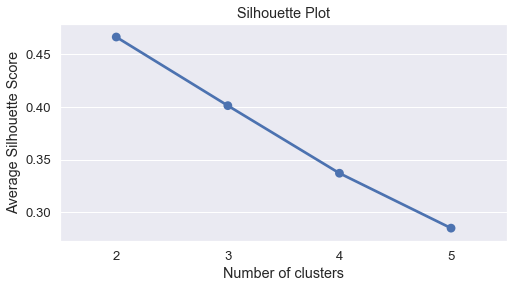

In [65]:
maxkey= [round(silhouette_score(bank_scaled,labels_2),3),round(silhouette_score(bank_scaled,labels_3),3),round(silhouette_score(bank_scaled,labels_4),3),round(silhouette_score(bank_scaled,labels_5),3)] 
fig,ax = plt.subplots(figsize=(8,4)) 
sns.pointplot([2,3,4,5],maxkey) 
ax.set_title('Silhouette Plot') 
ax.set_xlabel('Number of clusters') 
ax.set_ylabel('Average Silhouette Score') 
plt.show() 

In [66]:
bank.drop('clusters_hierarchical', axis=1,inplace = True)

In [67]:
bank["clusters_kmeans_2"] = labels_2

In [68]:
bank.to_csv('Kmeans_2_Clusters.csv')

In [20]:
Kmeans_2_Clusters=pd.read_csv('Kmeans_2_Clusters.csv') 

In [21]:
Kmeans_2_Clusters.drop('Unnamed: 0',axis=1,inplace = True)

In [22]:
Kmeans_2_Clusters.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_kmeans_2
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,1
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,1
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,0


In [72]:
bank.drop('clusters_kmeans_2',axis=1,inplace = True)

In [73]:
bank["clusters_kmeans_3"] = labels_3

In [74]:
bank.to_csv('Kmeans_3_Clusters.csv')

In [23]:
Kmeans_3_Clusters=pd.read_csv('Kmeans_3_Clusters.csv')

In [24]:
Kmeans_3_Clusters.drop('Unnamed: 0',axis=1,inplace = True)

In [25]:
Kmeans_3_Clusters.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters_kmeans_3
0,19940.0,1692.0,0.8752,6675.0,37630.0,325.2,6550.0,0
1,15990.0,1489.0,0.9064,5363.0,35820.0,333.6,5144.0,2
2,18950.0,1642.0,0.8829,6248.0,37550.0,336.8,6148.0,0
3,10830.0,1296.0,0.8099,5278.0,26410.0,518.2,5185.0,1
4,17990.0,1586.0,0.8992,5890.0,36940.0,206.8,5837.0,0


In [78]:
bank.drop('clusters_kmeans_3',axis=1,inplace = True)

In [ ]:
# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [35]:
heirarchical.clusters_hierarchical.value_counts().sort_index()

1     70
2    140
Name: clusters_hierarchical, dtype: int64

In [36]:
Kmeans_2_Clusters.clusters_kmeans_2.value_counts().sort_index()

0     77
1    133
Name: clusters_kmeans_2, dtype: int64

In [37]:
Kmeans_3_Clusters.clusters_kmeans_3.value_counts().sort_index()

0    67
1    72
2    71
Name: clusters_kmeans_3, dtype: int64

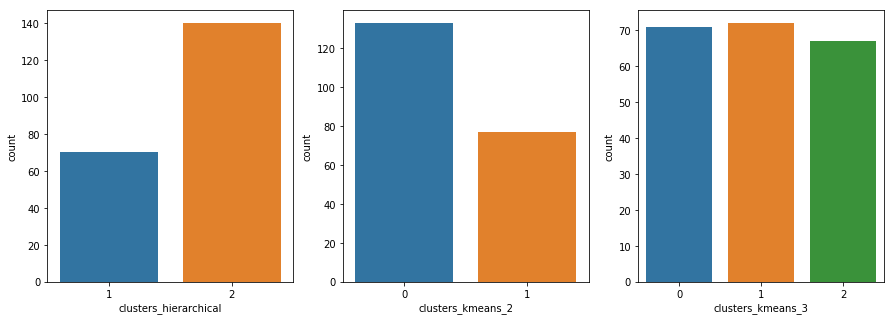

In [92]:
plt.figure(figsize= (15,5))
plt.subplot(1,3,1)
sns.countplot(heirarchical.clusters_hierarchical)

plt.subplot(1,3,2)
sns.countplot(Kmeans_2_Clusters.clusters_kmeans_2)

plt.subplot(1,3,3)
sns.countplot(Kmeans_3_Clusters.clusters_kmeans_3)


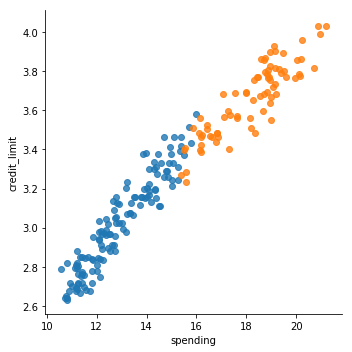

In [32]:
ax = sns.lmplot(data=Kmeans_2_Clusters, x='spending', y='credit_limit', hue='clusters_kmeans_2',
                fit_reg=False, legend=False, scatter=True) 

In [34]:
#Cluster profile
clust_profile_heirarchical=heirarchical.groupby('clusters_hierarchical').mean()
clust_profile_heirarchical['freq']=heirarchical.clusters_hierarchical.value_counts().sort_index()
clust_profile_heirarchical.transpose()

clusters_hierarchical,1,2
spending,18371.428571,13085.571429
advance_payments,1614.542857,1376.621429
probability_of_full_payment,0.884400,0.864298
current_balance,6158.171429,5363.714286
credit_limit,36846.285714,30455.928571
min_payment_amt,363.915714,373.072286
max_spent_in_single_shopping,6017.371429,5103.421429
freq,70.000000,140.000000


In [36]:
clust_profile_heirarchical=heirarchical.groupby('clusters_hierarchical')
clust_profile_heirarchical.describe().transpose()

clusters_hierarchical                          1             2
spending                     count     70.000000    140.000000
                             mean   18371.428571  13085.571429
                             std     1381.232684   1550.003143
                             min    15380.000000  10590.000000
                             25%    17330.000000  11817.500000
                             50%    18720.000000  12770.000000
                             75%    19137.500000  14347.500000
                             max    21180.000000  16630.000000
advance_payments             count     70.000000    140.000000
                             mean    1614.542857   1376.621429
                             std       59.927658     69.691558
                             min     1486.000000   1241.000000
                             25%     1573.750000   1320.750000
                             50%     1621.000000   1366.500000
                             75%     1655.750000   1430.500000
                             max     1725.000000   1546.000000
probability_of_full_payment  count     70.000000    140.000000
                             mean       0.884400      0.864298
                             std        0.014767      0.024405
                             min        0.845200      0.808100
                             25%        0.874700      0.848075
                             50%        0.883950      0.865800
                             75%        0.898225      0.882075
                             max        0.910800      0.918300
current_balance              count     70.000000    140.000000
                             mean    6158.171429   5363.714286
                             std      245.926051    230.739639
                             min     5709.000000   4899.000000
                             25%     5979.250000   5179.000000
                             50%     6148.500000   5351.000000
                             75%     6312.000000   5521.750000
                             max     6675.000000   6053.000000
credit_limit                 count     70.000000    140.000000
                             mean   36846.285714  30455.928571
                             std     1749.089346   2494.543368
                             min    32680.000000  26300.000000
                             25%    35542.500000  28352.500000
                             50%    36935.000000  30370.000000
                             75%    38047.500000  32345.000000
                             max    40330.000000  35820.000000
min_payment_amt              count     70.000000    140.000000
                             mean     363.915714    373.072286
                             std      120.827121    163.451369
                             min      147.200000     76.510000
                             25%      284.550000    246.175000
                             50%      362.900000    359.750000
                             75%      445.925000    487.925000
                             max      668.200000    845.600000
max_spent_in_single_shopping count     70.000000    140.000000
                             mean    6017.371429   5103.421429
                             std      251.131940    226.834205
                             min     5443.000000   4519.000000
                             25%     5877.000000   5000.000000
                             50%     5981.500000   5091.500000
                             75%     6187.750000   5222.500000
                             max     6550.000000   5879.000000

In [27]:
clust_profile_heirarchical=heirarchical.groupby('clusters_hierarchical').max()
clust_profile_heirarchical['freq']=heirarchical.clusters_hierarchical.value_counts().sort_index()
clust_profile_heirarchical.transpose()

clusters_hierarchical,1,2
spending,21180.0000,16630.0000
advance_payments,1725.0000,1546.0000
probability_of_full_payment,0.9108,0.9183
current_balance,6675.0000,6053.0000
credit_limit,40330.0000,35820.0000
min_payment_amt,668.2000,845.6000
max_spent_in_single_shopping,6550.0000,5879.0000
freq,70.0000,140.0000


In [39]:
clust_profile_kmeans_2=Kmeans_2_Clusters.groupby('clusters_kmeans_2').mean()
clust_profile_kmeans_2['freq']=Kmeans_2_Clusters.clusters_kmeans_2.value_counts().sort_index()
clust_profile_kmeans_2.transpose()

clusters_kmeans_2,0,1
spending,18158.571429,12930.601504
advance_payments,1605.480519,1369.345865
probability_of_full_payment,0.883817,0.863577
current_balance,6127.428571,5339.699248
credit_limit,36605.194805,30259.172932
min_payment_amt,348.041688,382.744436
max_spent_in_single_shopping,5971.740260,5081.736842
freq,77.000000,133.000000


In [40]:
clust_profile_kmeans_3=Kmeans_3_Clusters.groupby('clusters_kmeans_3').mean()
clust_profile_kmeans_3['freq']=Kmeans_3_Clusters.clusters_kmeans_3.value_counts().sort_index()
clust_profile_kmeans_3.transpose()

clusters_kmeans_3,0,1,2
spending,18495.373134,11856.944444,14437.887324
advance_payments,1620.343284,1324.777778,1433.774648
probability_of_full_payment,0.884210,0.848253,0.881597
current_balance,6175.686567,5231.750000,5514.577465
credit_limit,36975.373134,28495.416667,32592.253521
min_payment_amt,363.237313,474.238889,270.734085
max_spent_in_single_shopping,6041.701493,5101.722222,5120.802817
freq,67.000000,72.000000,71.000000


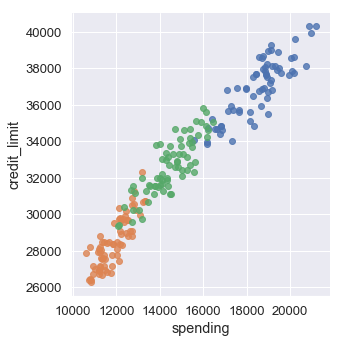

In [90]:
sns.lmplot(data=Kmeans_3_Clusters, x='spending', y='credit_limit', hue='clusters_kmeans_3',
                fit_reg=False, legend=False, scatter=True, height=5) 

In [30]:
'''Problem 2'''

In [31]:
# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [75]:
ins = pd.read_csv("insurance_part2_data.csv")

In [38]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [5]:
ins.shape

(3000, 10)

In [6]:
ins.info() # many columns are of type object i.e. strings. These need to be converted to ordinal type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [7]:
ins.isnull().values.any()

False

In [8]:
ins.describe(include = 'all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


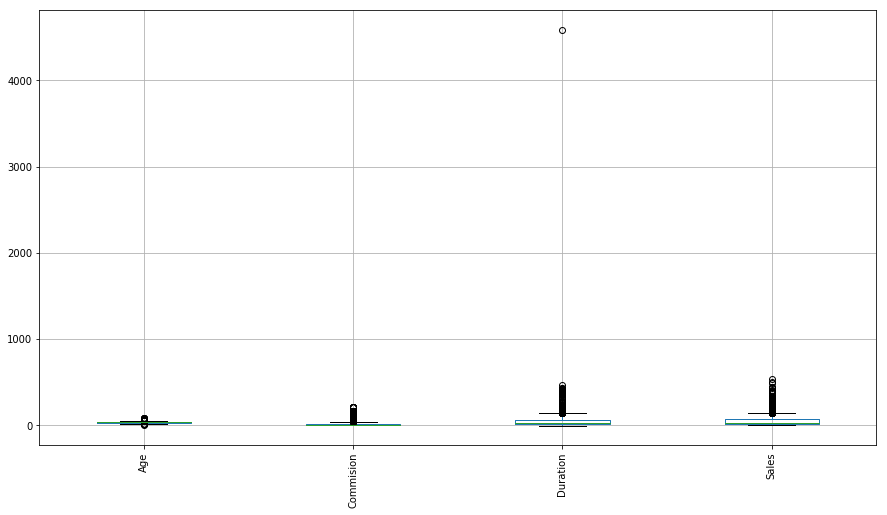

In [9]:
ins.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show()

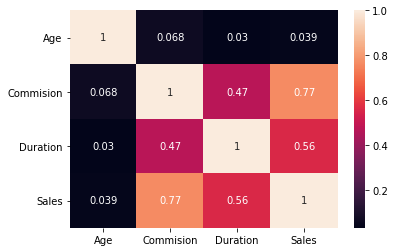

In [10]:
sns.heatmap(ins.corr(), annot=True)

In [103]:
ins.sort_values(by = "Duration", ascending = False).head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA
2914,64,CWT,Travel Agency,No,90.09,Online,466,138.60,Silver Plan,ASIA
2260,42,CWT,Travel Agency,No,132.99,Online,434,204.60,Gold Plan,ASIA
1398,34,C2B,Airlines,Yes,68.08,Online,431,272.30,Silver Plan,ASIA
873,31,C2B,Airlines,No,46.96,Online,428,187.85,Silver Plan,ASIA


In [104]:
ins[ins["Duration"] == ins["Duration"].min()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


In [105]:
ins[ins["Duration"] == ins["Duration"].max()]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


In [76]:
ins = ins.drop([1508,2845], axis=0)
ins.shape

(2998, 10)

In [107]:
ins.describe(include = 'all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,2998.000000,2998,2998,2998,2998.000000,2998,2998.000000,2998.000000,2998,2998
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2074,NaN,2952,NaN,NaN,1135,2463
mean,38.092061,NaN,NaN,NaN,14.536765,NaN,68.520680,60.283996,NaN,NaN
std,10.462712,NaN,NaN,NaN,25.488146,NaN,105.790319,70.744865,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.245000,NaN,63.000000,69.000000,NaN,NaN


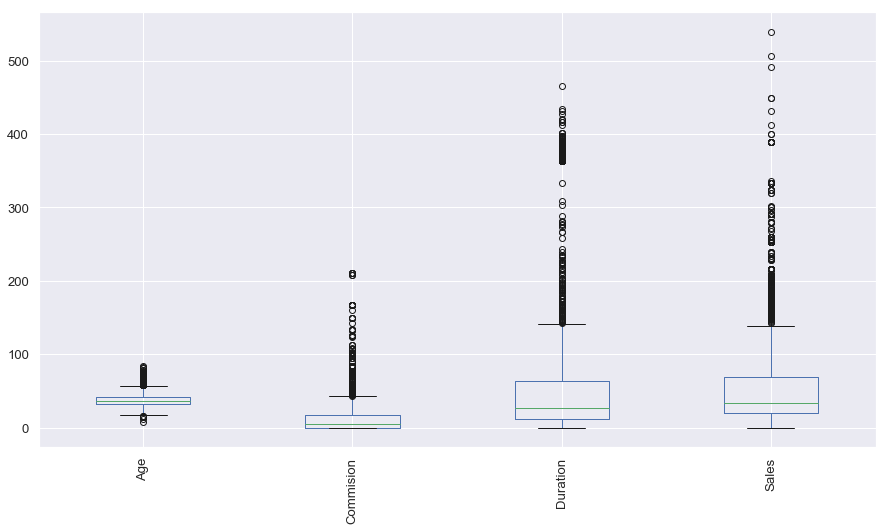

In [108]:
ins.boxplot(figsize=(15,8))
plt.xticks(rotation=90)
plt.show()

In [12]:
ins.duplicated().sum()

139

In [77]:
print("data size before removing duplicates",ins.shape)
ins =ins.drop_duplicates()
print("data size after removing duplicates",ins.shape)

data size before removing duplicates (2998, 10)
data size after removing duplicates (2859, 10)


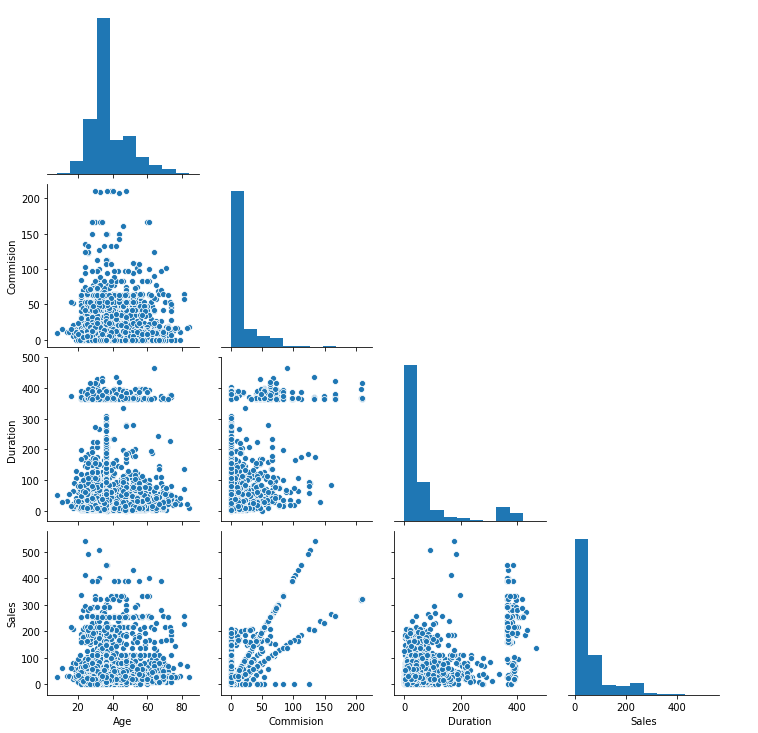

In [465]:
sns.pairplot(data = ins, corner = True)

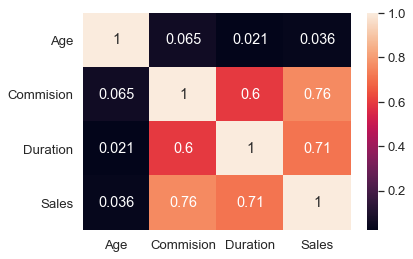

In [111]:
sns.heatmap(ins.corr(), annot=True)

In [467]:
ins.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

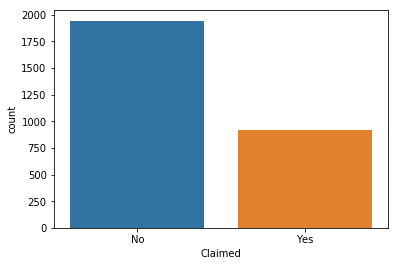

In [468]:
sns.countplot(ins.Claimed)

In [27]:
# ins["Claimed"] = pd.Categorical(ins["Claimed"]).codes

Text(0.5,1,'Destination')

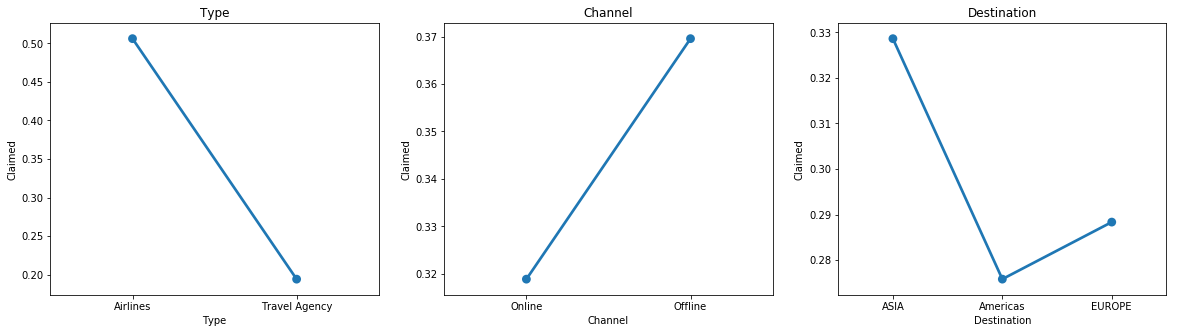

In [505]:
plt.figure(figsize= (20,5))
plt.subplot(1,3,1)
a = sns.pointplot(ins["Type"],ins["Claimed"],ci=False)
a.set_title('Type')
plt.subplot(1,3,2)
a = sns.pointplot(ins["Channel"],ins["Claimed"],ci=False)
a.set_title('Channel')
plt.subplot(1,3,3)
a = sns.pointplot(ins["Destination"],ins["Claimed"],ci=False)
a.set_title('Destination')

Text(0.5,1,'Product Name')

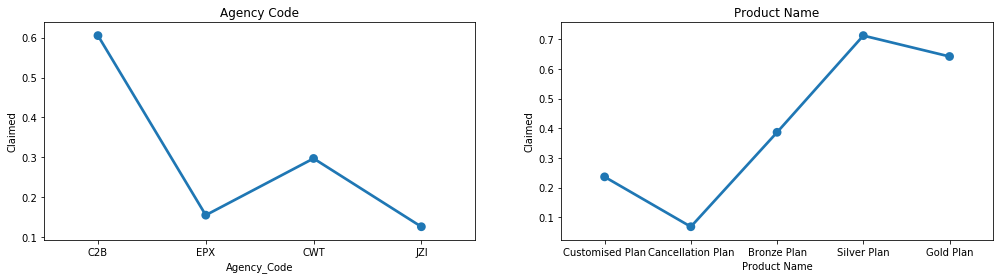

In [483]:
plt.figure(figsize= (17,4))
plt.subplot(1,2,1)
a = sns.pointplot(ins["Agency_Code"],ins["Claimed"],ci=False)
a.set_title('Agency Code')
plt.subplot(1,2,2)
a = sns.pointplot(ins["Product Name"],ins["Claimed"],ci=False)
a.set_title('Product Name')

Text(0.5, 1.0, 'Duration')

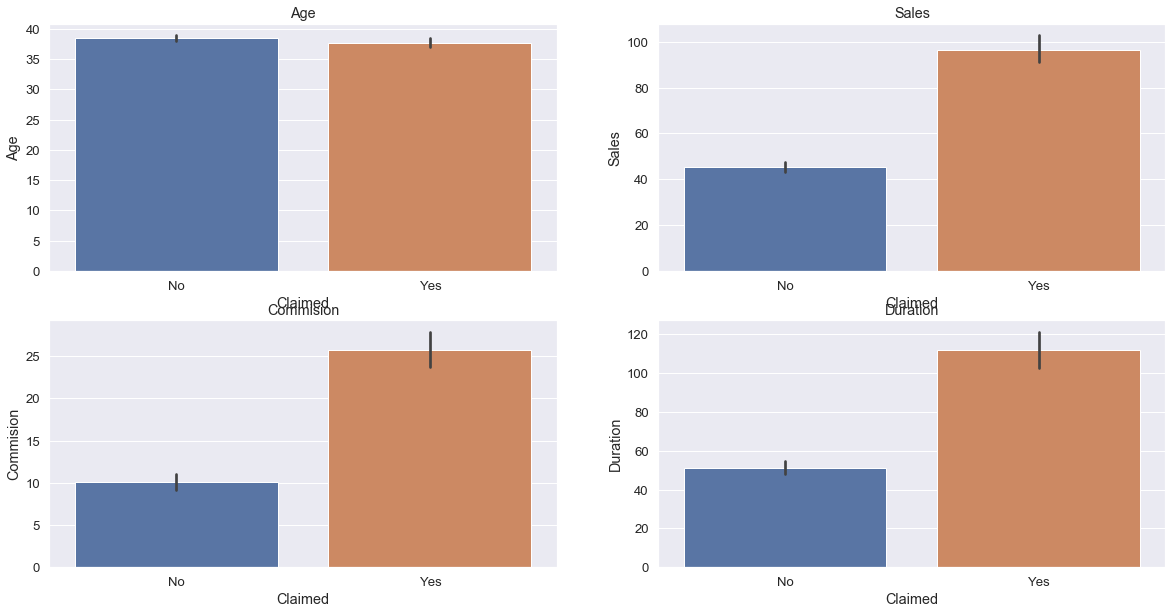

In [41]:
plt.figure(figsize= (20,10))
plt.subplot(2,2,1)
a = sns.barplot('Claimed','Age',data=ins)
a.set_title('Age')
plt.subplot(2,2,2)
a = sns.barplot('Claimed','Sales',data=ins)
a.set_title('Sales')
plt.subplot(2,2,3)
a = sns.barplot('Claimed','Commision',data=ins)
a.set_title('Commision')
plt.subplot(2,2,4)
a = sns.barplot('Claimed','Duration',data=ins)
a.set_title('Duration')

In [42]:
ins.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

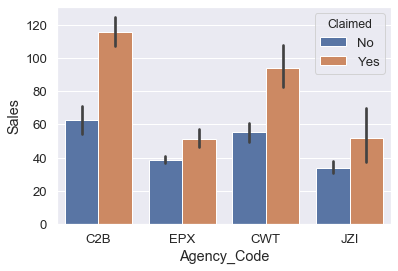

In [44]:
sns.barplot('Agency_Code','Sales',data=ins, hue= 'Claimed')

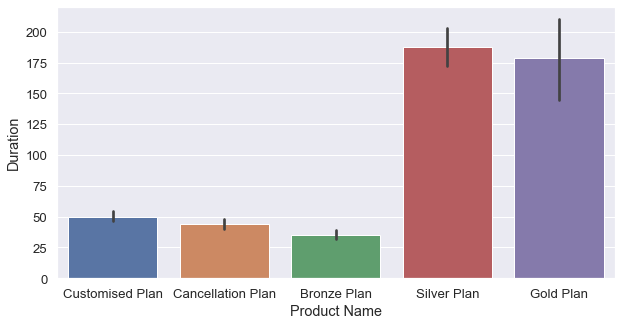

In [82]:
plt.figure(figsize= (10,5))
sns.barplot('Product Name','Duration',data=ins)

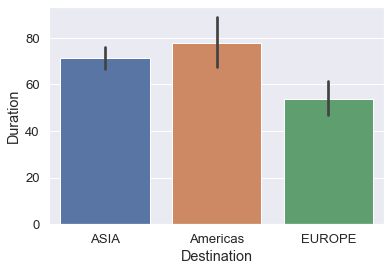

In [85]:
sns.barplot('Destination','Duration',data=ins)

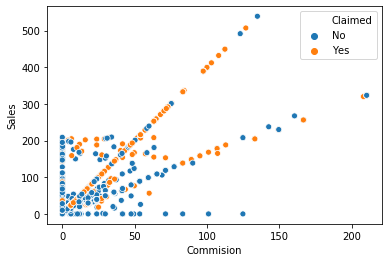

In [12]:
sns.scatterplot(ins['Commision'], ins['Sales'], hue=ins['Claimed']) 

In [114]:
print('Agency_Code\n',ins.Agency_Code.value_counts())
print('\n')
print('Type \n',ins.Type.value_counts())
print('\n')
print('Claimed \n',ins.Claimed.value_counts())
print('\n')
print('Channel \n',ins.Channel.value_counts())
print('\n')
print('Product Name \n',ins['Product Name'].value_counts())
print('\n')
print('Destination \n',ins.Destination.value_counts())

Agency_Code
 EPX    1238
C2B     912
CWT     471
JZI     238
Name: Agency_Code, dtype: int64


Type 
 Travel Agency    1709
Airlines         1150
Name: Type, dtype: int64


Claimed 
 No     1945
Yes     914
Name: Claimed, dtype: int64


Channel 
 Online     2813
Offline      46
Name: Channel, dtype: int64


Product Name 
 Customised Plan      1070
Bronze Plan           644
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64


Destination 
 ASIA        2325
Americas     319
EUROPE       215
Name: Destination, dtype: int64


In [45]:
# Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types.
for feature in ins.columns: 
    if ins[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins[feature].unique()))
        print(pd.Categorical(ins[feature].unique()).codes)
        ins[feature] = pd.Categorical(ins[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [116]:
# Comparing the unique counts from above
print('Agency_Code \n',ins.Agency_Code.value_counts())
print('\n')
print('Type \n',ins.Type.value_counts())
print('\n')
print('Claimed \n',ins.Claimed.value_counts())
print('\n')
print('Channel \n',ins.Channel.value_counts())
print('\n')
print('Product Name \n',ins['Product Name'].value_counts())
print('\n')
print('Destination \n',ins.Destination.value_counts())

Agency_Code 
 2    1238
0     912
1     471
3     238
Name: Agency_Code, dtype: int64


Type 
 1    1709
0    1150
Name: Type, dtype: int64


Claimed 
 0    1945
1     914
Name: Claimed, dtype: int64


Channel 
 1    2813
0      46
Name: Channel, dtype: int64


Product Name 
 2    1070
0     644
1     615
4     421
3     109
Name: Product Name, dtype: int64


Destination 
 0    2325
1     319
2     215
Name: Destination, dtype: int64


In [46]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2859 entries, 0 to 2999
Data columns (total 10 columns):
Age             2859 non-null int64
Agency_Code     2859 non-null int8
Type            2859 non-null int8
Claimed         2859 non-null int8
Commision       2859 non-null float64
Channel         2859 non-null int8
Duration        2859 non-null int64
Sales           2859 non-null float64
Product Name    2859 non-null int8
Destination     2859 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 128.4 KB


In [46]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [ ]:
# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [46]:
# capture the target column ("default") into separate vectors for training set and test set
X = ins.drop("Claimed" , axis=1)

y = ins.pop("Claimed")

In [55]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [56]:
# Checking dimensions on the train and test data
print('x_train: ',X_train.shape)
print('x_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (2001, 9)
x_test:  (858, 9)
y_train:  (2001,)
y_test:  (858,)


In [57]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini',random_state = 1)

In [59]:
# Fit the model
dt_model = dt_model.fit(X_train, y_train)

In [60]:
y_train_predict = dt_model.predict(X_train)
y_test_predict = dt_model.predict(X_test)

In [61]:
print('Accuracy Score is',round(accuracy_score(y_train, y_train_predict),2),'%')

Accuracy Score is 0.99 %


In [62]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1353
           1       1.00      0.98      0.99       648

    accuracy                           0.99      2001
   macro avg       1.00      0.99      0.99      2001
weighted avg       0.99      0.99      0.99      2001



In [58]:
print('Accuracy Score is',round(accuracy_score(y_test, y_test_predict),2),'%')

Accuracy Score is 0.71 %


In [59]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       592
           1       0.53      0.56      0.55       266

    accuracy                           0.71       858
   macro avg       0.66      0.67      0.67       858
weighted avg       0.72      0.71      0.71       858



In [130]:
# Code will save a .dot file in your working directory.
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('Claimed.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [63]:
# Variable Importance
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Duration      0.258851
Sales         0.239651
Agency_Code   0.177050
Age           0.163040
Commision     0.082167
Product Name  0.039745
Destination   0.030260
Channel       0.007310
Type          0.001926


In [64]:
# Regularising the Decision Tree

In [65]:
#GridSearch
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    'max_depth': [3,4,5,6], #by looking tree in webgraphwiz
    'min_samples_leaf': [15,20,25], #1- 3% of total observations
    'min_samples_split': [45,60,75], #approx 3 times the min_samples_leaf
}

dt_model = DecisionTreeClassifier(criterion = 'gini',random_state = 1)

grid_search_dt = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [67]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [68]:
grid_search_dt.best_params_

{'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 45}

In [69]:
best_grid_dt = grid_search_dt.best_estimator_

In [70]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('Claimed_new.dot','w')
dot_data = tree.export_graphviz(best_grid_dt, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [75]:
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

In [68]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [160]:
rfc = RandomForestClassifier(max_depth = 10, max_features = 4, min_samples_leaf = 5, min_samples_split = 15, n_estimators = 501, random_state = 1)
rfc = rfc.fit(X_train, y_train)

In [161]:
y_train_predict = rfc.predict(X_train)
y_test_predict = rfc.predict(X_test)

In [162]:
print('Accuracy Score is',round(accuracy_score(y_train, y_train_predict),2),'%')

Accuracy Score is 0.83 %


In [163]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1353
           1       0.77      0.67      0.72       648

    accuracy                           0.83      2001
   macro avg       0.81      0.79      0.80      2001
weighted avg       0.83      0.83      0.83      2001



In [164]:
print('Accuracy Score is',round(accuracy_score(y_test, y_test_predict),2),'%')

Accuracy Score is 0.78 %


In [165]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       592
           1       0.66      0.61      0.64       266

    accuracy                           0.78       858
   macro avg       0.75      0.74      0.74       858
weighted avg       0.78      0.78      0.78       858



In [175]:
param_grid1 = {
    'max_depth': [8, 10],
    'max_features': [4,6],#7 #approx square root of total variables 
    'min_samples_leaf': [5,10],#20,25 #1- 3% of total observations 
    'min_samples_split': [15,20],#30 #approx 3 times the min_samples_leaf 
    'n_estimators': [501] #101,301 #Generally is in multiples of 100.You can start with 100, can have other numbers too
}

rf_model = RandomForestClassifier(random_state = 1)

grid_search_rf = GridSearchCV(estimator = rf_model, param_grid = param_grid1, cv = 10)

In [176]:
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [8, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [15, 20], 'n_estimators': [501]})

In [177]:
grid_search_rf.best_params_

{'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 501}

In [178]:
best_grid_rf = grid_search_rf.best_estimator_

In [179]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

In [184]:
# MLP Classifier (Artificial Neural Network)
from sklearn.neural_network import MLPClassifier

In [185]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [186]:
clf = MLPClassifier(hidden_layer_sizes=80, max_iter=500,
                     solver='adam',activation='relu', verbose=True,  random_state=1,tol=0.01)

In [187]:
clf.fit(X_trains, y_train)

Iteration 1, loss = 0.68796231
Iteration 2, loss = 0.61352095
Iteration 3, loss = 0.56919144
Iteration 4, loss = 0.54367812
Iteration 5, loss = 0.53073953
Iteration 6, loss = 0.52312607
Iteration 7, loss = 0.51768226
Iteration 8, loss = 0.51470379
Iteration 9, loss = 0.51225365
Iteration 10, loss = 0.51257282
Iteration 11, loss = 0.51249012
Iteration 12, loss = 0.51213346
Iteration 13, loss = 0.51128958
Iteration 14, loss = 0.51027906
Iteration 15, loss = 0.50987870
Iteration 16, loss = 0.50962277
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=80, max_iter=500, random_state=1, tol=0.01,
              verbose=True)

In [188]:
y_pred = clf.predict(X_tests)

In [189]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [70,80,100], #random start with 100
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01],
    'max_iter' : [500,1000] #starts with 1000.higher numbers more accurate
}

ann_model = MLPClassifier(random_state=1)

grid_search_ann = GridSearchCV(estimator = ann_model, param_grid = param_grid, cv = 10)

In [190]:
grid_search_ann.fit(X_trains, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [70, 80, 100],
                         'max_iter': [500, 1000], 'solver': ['sgd', 'adam'],
                         'tol': [0.01]})

In [191]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 80,
 'max_iter': 500,
 'solver': 'adam',
 'tol': 0.01}

In [192]:
best_grid_ann = grid_search_ann.best_estimator_

In [193]:
ytrain_predict_ann = best_grid_ann.predict(X_trains)
ytest_predict_ann = best_grid_ann.predict(X_tests)

In [54]:
# 2.3 Performance Metrics: Check the performance of Predictions on Train 
#     and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model
# Evaluating model performance on training and testing data
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

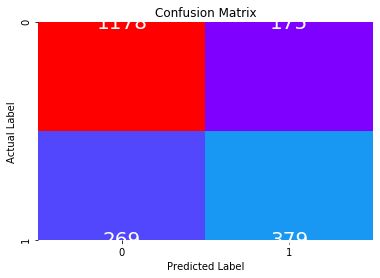

In [195]:
#Decision Tree Training data
confusion_matrix(y_train,ytrain_predict_dt)
sns.heatmap(confusion_matrix(y_train,ytrain_predict_dt),annot=True, fmt='d',cbar=False, cmap='rainbow',annot_kws={"size": 20})
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [67]:
print('Accuracy Score is',round(accuracy_score(y_train, ytrain_predict_dt),2),'%')

Accuracy Score is 0.78 %


Area under Curve is 0.73


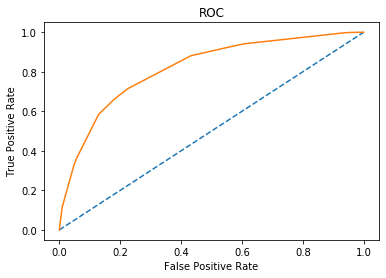

In [197]:
# predict probabilities
probs = best_grid_dt.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('Area under Curve is',round(roc_auc_score(y_train,best_grid_dt.predict(X_train)),2))
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

In [204]:
print(classification_report(y_train,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1353
           1       0.68      0.58      0.63       648

    accuracy                           0.78      2001
   macro avg       0.75      0.73      0.74      2001
weighted avg       0.77      0.78      0.77      2001



In [205]:
cart_metrics=classification_report(y_train, ytrain_predict_dt,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.68
cart_train_recall  0.58
cart_train_f1  0.63


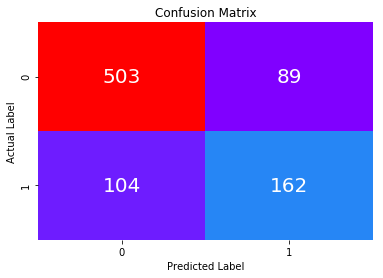

In [445]:
#Decision Tree Testing data
confusion_matrix(y_test,ytest_predict_dt)
sns.heatmap(confusion_matrix(y_test,ytest_predict_dt),annot=True, fmt='d',cbar=False, cmap='rainbow',annot_kws={"size": 20})
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [447]:
print('Accuracy Score is',round(accuracy_score(y_test,ytest_predict_dt),2),'%')

Accuracy Score is 0.78 %


Area under Curve is 0.73


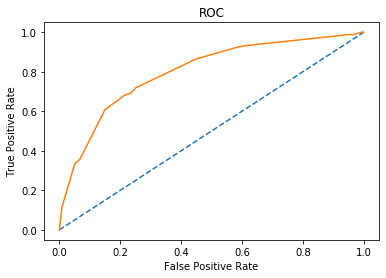

In [199]:
# predict probabilities
probs = best_grid_dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('Area under Curve is',round(roc_auc_score(y_test,best_grid_dt.predict(X_test)),2))
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [207]:
print(classification_report(y_test,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       592
           1       0.65      0.61      0.63       266

    accuracy                           0.78       858
   macro avg       0.74      0.73      0.73       858
weighted avg       0.77      0.78      0.77       858



In [209]:
cart_metrics=classification_report(y_test, ytest_predict_dt,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.65
cart_train_recall  0.61
cart_train_f1  0.63


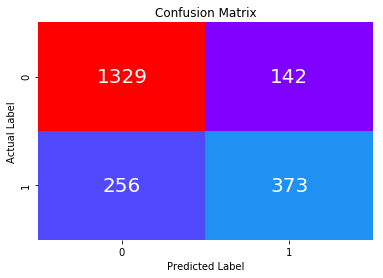

In [180]:
#Random forest Training data
confusion_matrix(y_train,ytrain_predict_rf)
sns.heatmap(confusion_matrix(y_train,ytrain_predict_rf),annot=True, fmt='d',cbar=False, cmap='rainbow',annot_kws={"size": 20})
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [210]:
print('Accuracy Score is',round(accuracy_score(y_train, ytrain_predict_rf),2),'%')

Accuracy Score is 0.83 %


Area under Curve is 0.79


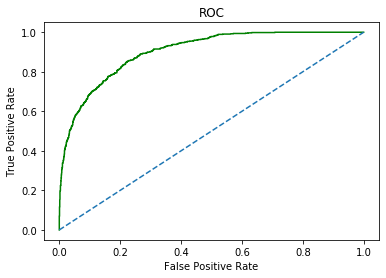

In [213]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid_rf.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid_rf.predict(X_train))
print('Area under Curve is',round(roc_auc_score(y_train,best_grid_rf.predict(X_train)),2))

In [211]:
print(classification_report(y_train,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1353
           1       0.77      0.67      0.72       648

    accuracy                           0.83      2001
   macro avg       0.81      0.79      0.80      2001
weighted avg       0.83      0.83      0.83      2001



In [214]:
rf_metrics=classification_report(y_train, ytrain_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.77
rf_train_recall  0.67
rf_train_f1  0.72


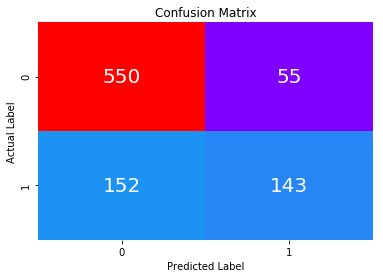

In [184]:
#Random forest Testing data
confusion_matrix(y_test,ytest_predict_rf)
sns.heatmap(confusion_matrix(y_test,ytest_predict_rf),annot=True, fmt='d',cbar=False, cmap='rainbow',annot_kws={"size": 20})
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [98]:
print('Accuracy Score is',round(accuracy_score(y_test,ytest_predict_rf),2),'%')

Accuracy Score is 0.77 %


Area under Curve is 0.74


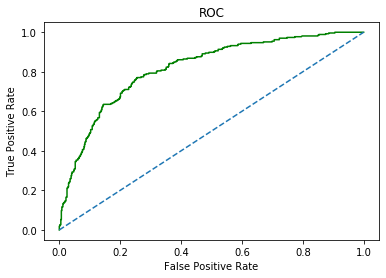

In [215]:
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid_rf.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid_rf.predict(X_test))
print('Area under Curve is',round(roc_auc_score(y_test,best_grid_rf.predict(X_test)),2))

In [181]:
print(classification_report(y_test,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       592
           1       0.66      0.61      0.64       266

    accuracy                           0.78       858
   macro avg       0.75      0.74      0.74       858
weighted avg       0.78      0.78      0.78       858



In [216]:
rf_metrics=classification_report(y_test, ytest_predict_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.66
rf_test_recall  0.61
rf_test_f1  0.64


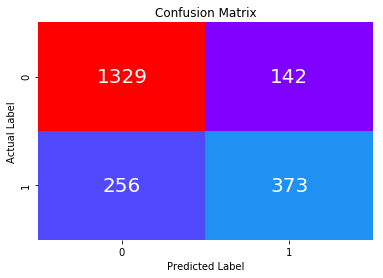

In [242]:
#ANN training data
confusion_matrix(y_train,ytrain_predict_ann)
sns.heatmap(confusion_matrix(y_train,ytrain_predict_ann),annot=True, fmt='d',cbar=False, cmap='rainbow',annot_kws={"size": 20})
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [217]:
print('Accuracy Score is',round(accuracy_score(y_train, ytrain_predict_ann),2),'%')

Accuracy Score is 0.75 %


Area under Curve is 0.68


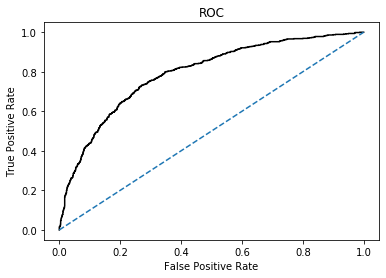

In [219]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid_ann.predict_proba(X_trains)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid_ann.predict(X_trains))
print('Area under Curve is',round(roc_auc_score(y_train,best_grid_ann.predict(X_trains)),2))

In [94]:
print(classification_report(y_train,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1353
           1       0.67      0.48      0.56       648

    accuracy                           0.75      2001
   macro avg       0.72      0.68      0.69      2001
weighted avg       0.74      0.75      0.74      2001



In [220]:
nn_metrics=classification_report(y_train, ytrain_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.67
nn_train_recall  0.48
nn_train_f1  0.56


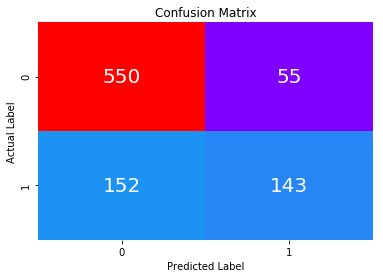

In [238]:
#ANN Testing data
confusion_matrix(y_test,ytest_predict_ann)
sns.heatmap(confusion_matrix(y_test,ytest_predict_ann),annot=True, fmt='d',cbar=False, cmap='rainbow',annot_kws={"size": 20})
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [221]:
print('Accuracy Score is',round(accuracy_score(y_test,ytest_predict_ann),2),'%')

Accuracy Score is 0.77 %


Area under Curve is 0.7


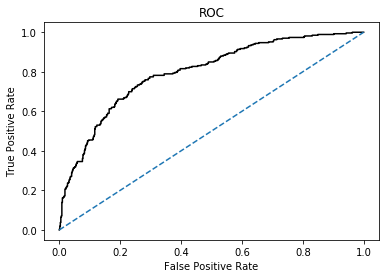

In [223]:
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid_ann.predict_proba(X_tests)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid_ann.predict(X_tests))
print('Area under Curve is',round(roc_auc_score(y_test,best_grid_ann.predict(X_tests)),2))

In [98]:
print(classification_report(y_test,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       592
           1       0.66      0.52      0.58       266

    accuracy                           0.77       858
   macro avg       0.73      0.70      0.71       858
weighted avg       0.76      0.77      0.76       858



In [224]:
nn_metrics=classification_report(y_test, ytest_predict_ann,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.66
nn_test_recall  0.52
nn_test_f1  0.58


In [109]:
Q1 = ins.quantile(0.25)
Q3 = ins.quantile(0.75)
IQR = Q3 - Q1
ins_IQR_replace = ins.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(ins_IQR_replace < Q1 - 1.5 * IQR)[0], np.where(ins_IQR_replace < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    ins_IQR_replace.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(ins_IQR_replace > Q3 + 1.5 * IQR)[0], np.where(ins_IQR_replace > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    ins_IQR_replace.iloc[i,j] = whisker[j]
ins_IQR_replace.shape   

(2859, 10)

In [113]:
X = ins_IQR_replace.drop("Claimed" , axis=1)

y = ins_IQR_replace.pop("Claimed")

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [115]:
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [117]:
param_grid = {
    'hidden_layer_sizes': [70,80,100], #random start with 100
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01],
    'max_iter' : [500,1000] #starts with 1000.higher numbers more accurate
}
ann_model = MLPClassifier(random_state=1)

grid_search_ann = GridSearchCV(estimator = ann_model, param_grid = param_grid, cv = 10)

In [118]:
grid_search_ann.fit(X_trains, y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [70, 80, 100],
                         'max_iter': [500, 1000], 'solver': ['sgd', 'adam'],
                         'tol': [0.01]})

In [119]:
grid_search_ann.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': 100,
 'max_iter': 500,
 'solver': 'adam',
 'tol': 0.01}

In [121]:
best_grid_ann = grid_search_ann.best_estimator_

In [122]:
ytrain_predict_ann = best_grid_ann.predict(X_trains)
ytest_predict_ann = best_grid_ann.predict(X_tests)

In [123]:
print(classification_report(y_train,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1353
           1       0.71      0.46      0.56       648

    accuracy                           0.76      2001
   macro avg       0.74      0.68      0.70      2001
weighted avg       0.75      0.76      0.75      2001



In [124]:
print(classification_report(y_test,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       592
           1       0.68      0.48      0.57       266

    accuracy                           0.77       858
   macro avg       0.74      0.69      0.70       858
weighted avg       0.76      0.77      0.76       858



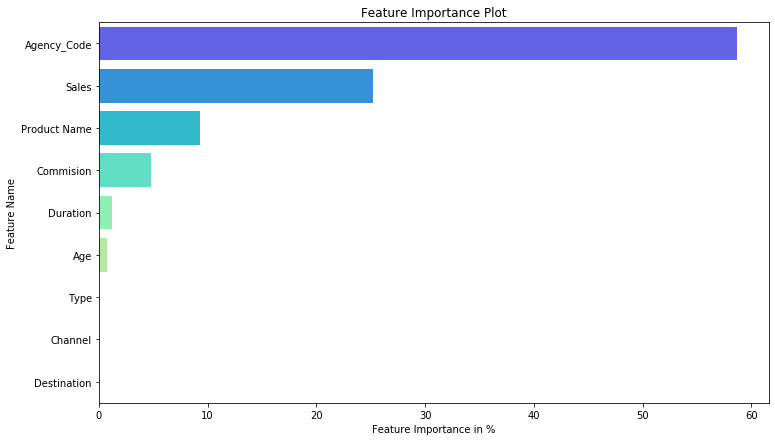

In [231]:
x=pd.DataFrame(grid_search_dt.best_estimator_.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

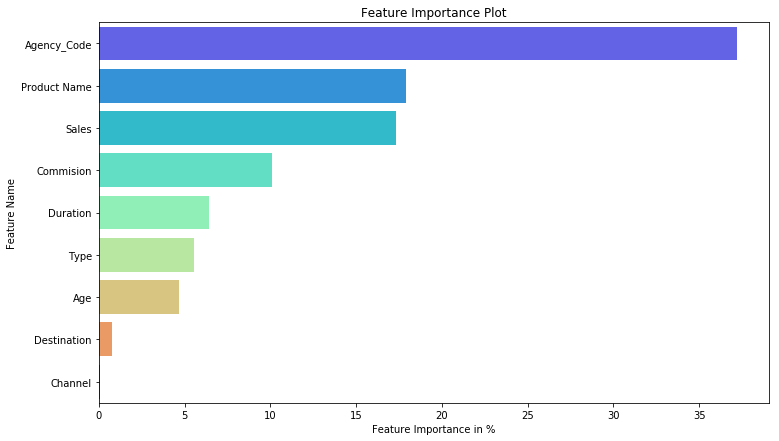

In [250]:
x=pd.DataFrame(grid_search_rf.best_estimator_.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

In [227]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[round(accuracy_score(y_test,ytest_predict_dt),2),cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[round(accuracy_score(y_test,ytest_predict_dt),2),cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[round(accuracy_score(y_test,ytest_predict_rf),2),rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[round(accuracy_score(y_test,ytest_predict_rf),2),rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[round(accuracy_score(y_train,ytrain_predict_ann),2),nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[round(accuracy_score(y_test,ytest_predict_ann),2),nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.78,0.78,0.78,0.75,0.77
AUC,0.82,0.80,0.79,0.74,0.68,0.70
Recall,0.58,0.61,0.67,0.61,0.48,0.52
Precision,0.68,0.65,0.77,0.66,0.67,0.66
F1 Score,0.63,0.63,0.72,0.64,0.56,0.58


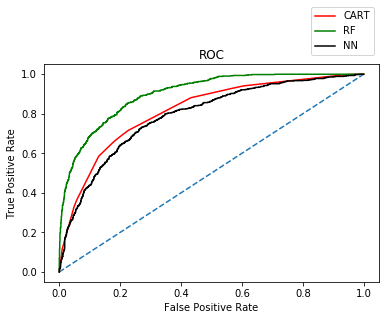

In [228]:
# ROC Curve for the 3 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

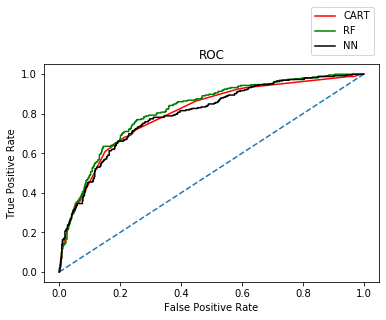

In [229]:
# ROC Curve for the 3 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')